In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [6]:
data = pd.read_csv('./Healthcare-Diabetes.csv')
data.sample(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2182,2183,3,111,56,39,0,30.1,0.557,30,0
1310,1311,10,90,85,32,0,34.9,0.825,56,1
2722,2723,8,84,74,31,0,38.3,0.457,39,0
2216,2217,0,78,88,29,40,36.9,0.434,21,0
1144,1145,0,98,82,15,84,25.2,0.299,22,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [9]:
data.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.duplicated().sum()

0

### Getting know to data

In [84]:
# Five number summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
data.Outcome.value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

Percentage of data distirbution : Outcome
0    65.606936
1    34.393064
Name: count, dtype: float64


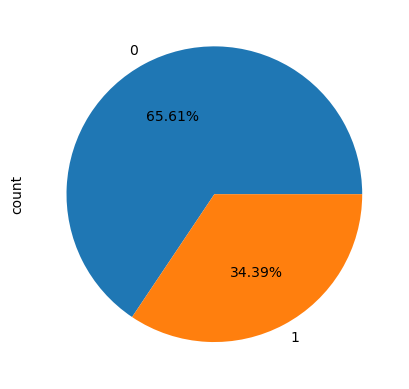

In [17]:
# Plotting Outcome feature

print(f'Percentage of data distirbution : {data.Outcome.value_counts() * 100 / data.shape[0]}')
data.Outcome.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

- It is imbalanced dataset

- Although id feature is not a significant one so let's drop it

In [18]:
data.drop('Id', axis = 1, inplace = True)

In [20]:
data.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [22]:
data.Pregnancies.value_counts()

Pregnancies
1     491
0     412
2     387
3     270
4     259
5     198
6     181
7     145
8     134
9      98
10     78
11     35
13     32
12     32
14      9
17      4
15      3
Name: count, dtype: int64

In [21]:
data.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [25]:
data.BloodPressure.value_counts().sort_index(ascending = False)

BloodPressure
122      4
114      4
110     10
108      7
106     12
104      7
102      4
100     12
98      11
96      12
95       3
94      24
92      20
90      77
88      92
86      74
85      20
84      84
82     113
80     138
78     173
76     132
75      28
74     197
72     162
70     201
68     170
66      95
65      26
64     163
62     128
61       5
60     129
58      75
56      43
55       6
54      42
52      40
50      44
48      18
46       8
44      15
40       3
38       4
30       5
24       3
0      125
Name: count, dtype: int64

In [27]:
data.SkinThickness.unique()

array([ 35,  29,   0,  23,  32,  45,  19,  47,  38,  30,  41,  33,  26,
        15,  36,  11,  31,  37,  42,  25,  18,  24,  39,  27,  21,  34,
        10,  60,  13,  20,  22,  28,  54,  40,  51,  56,  14,  17,  50,
        44,  12,  46,  16,   7,  52,  43,  48,   8,  49,  63,  99,  59,
       110], dtype=int64)

In [33]:
data.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [35]:
data.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [37]:
data.DiabetesPedigreeFunction.unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [39]:
data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

### EDA

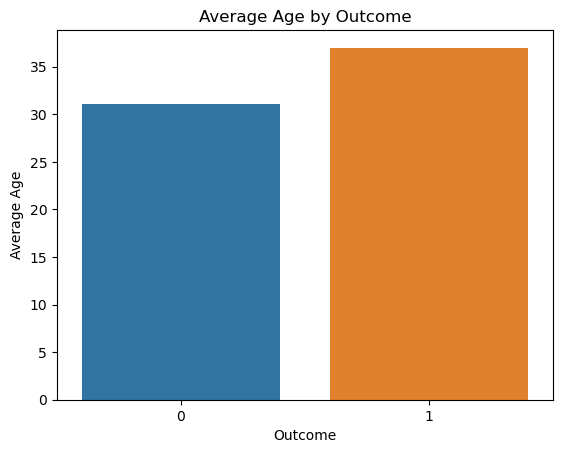

In [44]:
sns.barplot(x='Outcome', y='Age', data=data, ci=None)
plt.title('Average Age by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average Age')
plt.show()

- Average age of Diabetes patient is high compare to non-diabetes patient

In [45]:

x = data.Pregnancies.value_counts().keys().to_numpy()
y = data.Pregnancies.value_counts().values

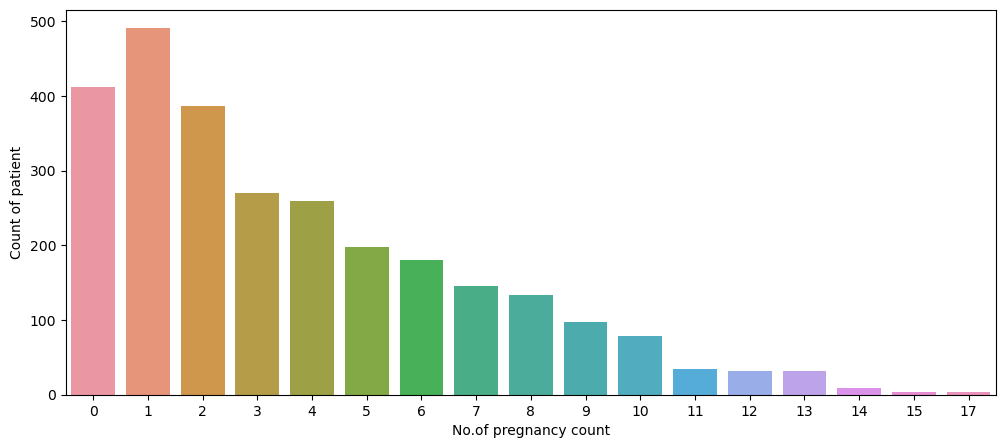

In [20]:
plt.figure(figsize = (12, 5))
sns.barplot(x = x, y = y)

plt.xlabel('No.of pregnancy count')
plt.ylabel('Count of patient')
plt.show()

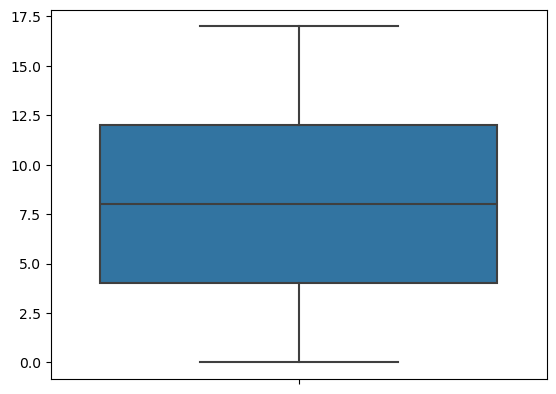

In [80]:
sns.boxplot(y = x)
plt.show()

- Average pregnancy count is around 7.5
- 14, 15, 17 pregnancy count are not considered as outliers

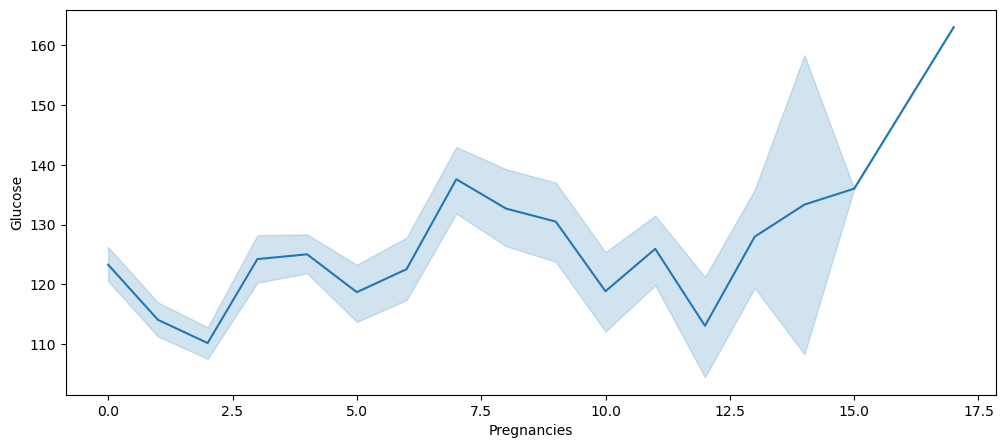

In [102]:
plt.figure(figsize = (12, 5))
sns.lineplot(data = data, x = 'Pregnancies', y = 'Glucose')
plt.show()

- Initially with no pregnancy Glucose level is around 125 as pregnancy goes upto 2.5 their is decreasing trend in glucose level
- After 3 pregnancies their is increasing trend in glucose level
- There is high glucose level after 14 pregnancies

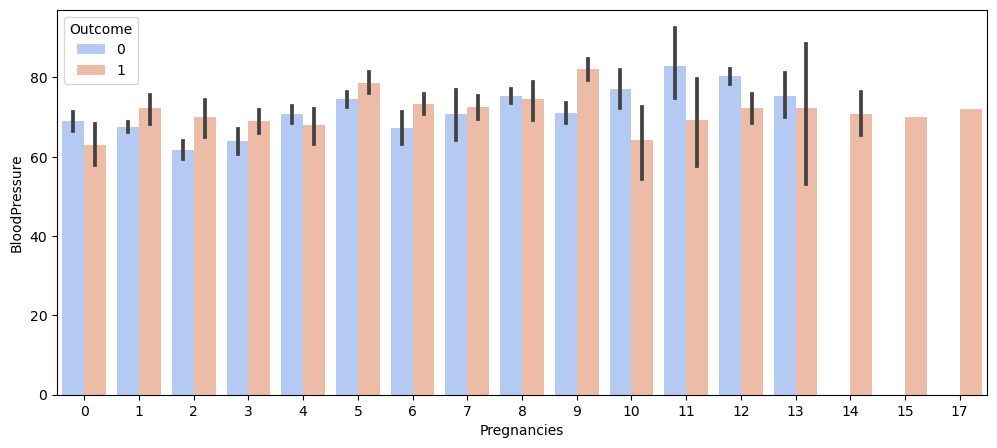

In [41]:
plt.figure(figsize = (12, 5))
sns.barplot(data = data, x = 'Pregnancies', y = 'BloodPressure', hue = 'Outcome', palette = 'coolwarm')
plt.show()

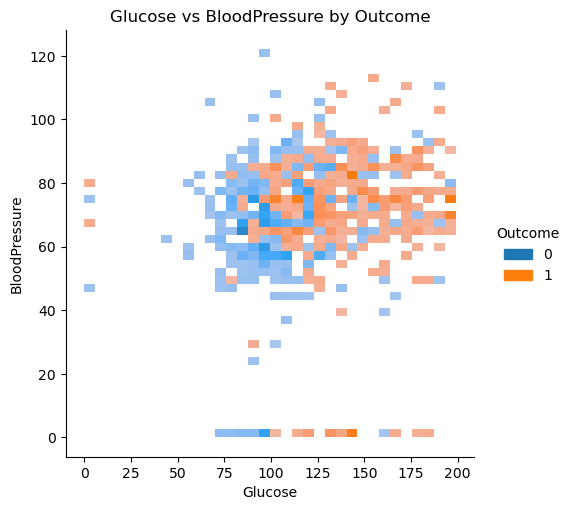

In [37]:
sns.displot(x='Glucose', y='BloodPressure', hue='Outcome', data=data)
plt.title('Glucose vs BloodPressure by Outcome')
plt.show()

- As Glucose raises there is a chance of Diabetes

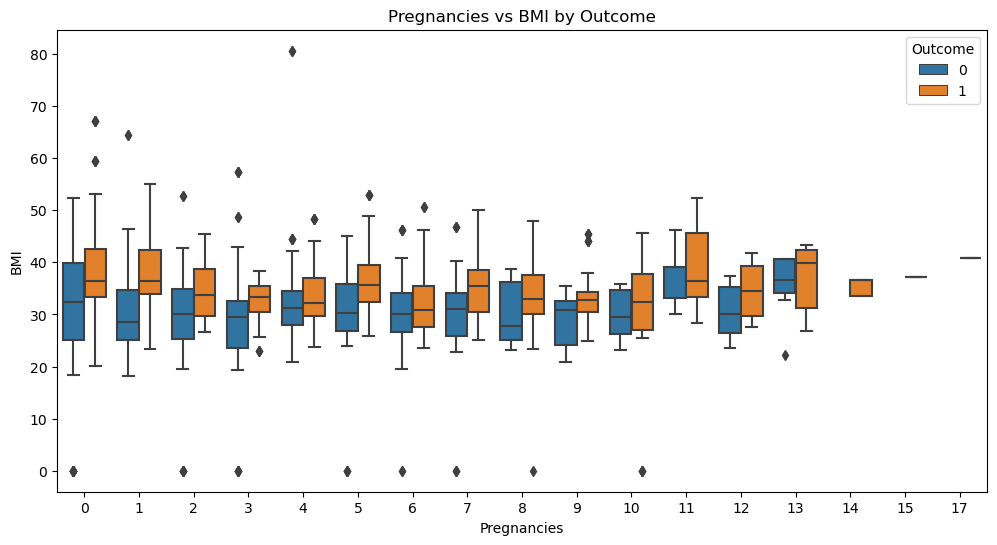

In [35]:
plt.figure(figsize = (12, 6))
sns.boxplot(x='Pregnancies', y='BMI', hue='Outcome', data=data)
plt.title('Pregnancies vs BMI by Outcome')
plt.show()

- As increase in BMI is a sign of Diabetes

In [47]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
897,0,105,84,0,0,27.9,0.741,62,1
1342,1,143,86,30,330,30.1,0.892,23,0
1709,0,137,70,38,0,33.2,0.170,22,0
519,6,129,90,7,326,19.6,0.582,60,0
1114,1,139,46,19,83,28.7,0.654,22,0
1562,2,112,75,32,0,35.7,0.148,21,0
2429,8,197,74,0,0,25.9,1.191,39,1
2540,5,136,82,0,0,0.0,0.640,69,0
2267,0,189,104,25,0,34.3,0.435,41,1
744,13,153,88,37,140,40.6,1.174,39,0
